## Student Name: Tadhg Philibin e Silva
## Student ID: 22275363

# Task 2

- Open a new Jupyter notebook and name it etivity1.ipynb. 
- In your own notebook, perform EDA with the bank data set by following the examples in the provided notebook “Lab 1 - Exploratory Data Analysis. ipynb”.

- Formulate a particular question that might be interesting to answer by exploring this dataset (approx. 50 words in a markdown cell).

- Calculate statistics for the numerical and categorical attributes. 
    - Draw a short conclusion (approx. 150 words in a markdown cell).

- Use at least two different plotting techniques to plot the distribution of some numerical attributes. 
    - Draw short conclusions (approx. 150 words in a markdown cell).

- Generate two plots with the combined distribution of attributes and draw conclusions from them (approx. 150 words in a markdown cell).
    - Make sure your conclusions are related to the question you have formulated.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### bank client data:
0.  age         1988 non-null   float64
    - age (numeric)


1.  job         1990 non-null   object 
    - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')


2.  marital     2000 non-null   object 
    - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)


3.  education   1896 non-null   object 
    - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')


4.  default     2000 non-null   object 
    - default: has credit in default? (categorical: 'no','yes','unknown')


5.  balance     2000 non-null   int64  
    - ### NO INFO, presumably bank balance


6.  housing     2000 non-null   object 
    - housing: has housing loan? (categorical: 'no','yes','unknown')


7.  loan        2000 non-null   object 
    - loan: has personal loan? (categorical: 'no','yes','unknown')


### related with the last contact of the current campaign:

8.  contact     1809 non-null   object 
    - contact: contact communication type (categorical: 'cellular','telephone')


9.  day         2000 non-null   int64  
    - day: last contact day of the month (int64: 1,  2,  3,  4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31)


10. month       2000 non-null   object 
    - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')


11. duration    2000 non-null   int64  
    - duration: last contact duration, in seconds (numeric). 
    - Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
    - Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


12. campaign    2000 non-null   int64  
    - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


13. pdays       2000 non-null   int64  
    - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)


14. previous    2000 non-null   int64 
    - previous: number of contacts performed before this campaign and for this client (numeric)


### Other attributes:
15. poutcome    1546 non-null   object
    - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### Output variable (desired target):
16. subscribed  2000 non-null   object 
    - y - has the client subscribed a term deposit? (binary: 'yes','no')
    
---

---

# Requirement 1

### Formulate a particular question that might be interesting to answer by exploring this dataset (approx. 50 words in a markdown cell).

### Do follow-up calls have a profound effect on the likelihood that a person will subscribe and are some classes of people more receptive than others? 

If a client entertains a call-back, what is increase in conversion likelihood? What is the number of calls that produces the highest likelihood of conversion? Is there a number of calls that can be considered a waste of time due to low conversion rates? Is your likelihood of converting on the 2nd, 3rd, 4th, call more than on the first ? Could it be better to just cut losses early and move on to the next client rather than following up?
Are there particular attributes that make a client particular receptive or resistant to follow up calls?

In [121]:
df = pd.read_csv('./bank.csv')

---

# Requirement 2

### Calculate statistics for the numerical and categorical attributes. 
### Draw a short conclusion (approx. 150 words in a markdown cell).

First we want to get the high-level view of the data as-is (not necessarily how the author describes it)

In [122]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [123]:
df[df['age'] % 1 > 0]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, subscribed]
Index: []

The age column is stored as a float but fractional values are never actually used, with all ages being rounded to an integer value.

In [124]:
df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [125]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total  Percent
poutcome     454   0.2270
contact      191   0.0955
education    104   0.0520
age           12   0.0060
job           10   0.0050

There are some missing values. In the data preparation/cleaning phase, there would be a decision of how to deal with these missing values. You can delete the row if the missing value means that the row is useless. Another option is to try and interpolate the missing value based on averages and the values found in similar rows.

In [126]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [127]:
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

To get a view of the numerical attributes we can invoke the describe() function.

In [128]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [129]:
total_subscribed = df[df['subscribed'] == 'yes']
len(total_subscribed)

1000

In total, there are 2000 entrants in the dataset and we can see that it is extremely balanced with exactly half (i.e. 1000) of the samples being successful subscriptions. 

In [130]:
married = df[df['marital'] == 'married']
divorced = df[df['marital'] == 'divorced']
single = df[df['marital'] == 'single']

print(f'The number of married clients is: {len(married)}')
print(f'The number of divorced clients is: {len(divorced)}')
print(f'The number of single clients is: {len(single)}')

The number of married clients is: 1111
The number of divorced clients is: 215
The number of single clients is: 674


In [131]:
married_and_subcribed = married[married['subscribed'] == 'yes']
divorced_and_subcribed = divorced[divorced['subscribed'] == 'yes']
single_and_subcribed = single[single['subscribed'] == 'yes']

In [132]:
pct_married_and_subcribed = len(married_and_subcribed) / len(married)
pct_divorced_and_subcribed = len(divorced_and_subcribed) / len(married)
pct_single_and_subcribed = len(single_and_subcribed) / len(married)

print(f'The subscription success rate of married clients is: {pct_married_and_subcribed}')
print(f'The subscription success rate of divorced clients is: {pct_divorced_and_subcribed}')
print(f'The subscription success rate of single clients is: {pct_single_and_subcribed}')


The subscription success rate of married clients is: 0.45094509450945097
The subscription success rate of divorced clients is: 0.0846084608460846
The subscription success rate of single clients is: 0.3645364536453645


It is interesting to see that divorced clients have an extremely low probability of subscribing. At just 8%, it is probably not worth pursuing these clients at all, assuming that their marital information is known before-hand.

In [133]:
clients_with_loan = df[df['loan'] == 'yes']
len(clients_with_loan)

250

In [134]:
len(clients_with_loan[clients_with_loan['subscribed'] == 'yes'])

43

If a client has a pre-existing personal loan, the probability of subscribing is very low.

Just 43 out of the 250 clients with pre-existing loans decided to subscribe, this is just 17%.

In [135]:
df[['balance','subscribed']].groupby('subscribed').describe().transpose()

subscribed               no           yes
balance count   1000.000000   1000.000000
        mean     942.862000   1884.465000
        std     2007.134003   3891.864047
        min     -980.000000   -205.000000
        25%      114.750000    315.000000
        50%      393.000000    875.000000
        75%      970.250000   2304.500000
        max    26306.000000  81204.000000

Examining the _balance_ feature, we can see that the average bank balance for those that subscribed is double that of the average for those that didn't. While it may be somewhat intuitive that people with less disposable income are less likely to subscribe to a term deposit saving scheme, having a low balance did not prevent others from subscribing. The lowest-balance subscriber has a negative balance of -205.00 and the lower quartile is just 315.00 

---

# Requirement 3

### Use at least two different plotting techniques to plot the distribution of some numerical attributes. 
### Draw short conclusions (approx. 150 words in a markdown cell).

Text(0.5, 1.0, 'How many previous calls did successful campaigns have?')

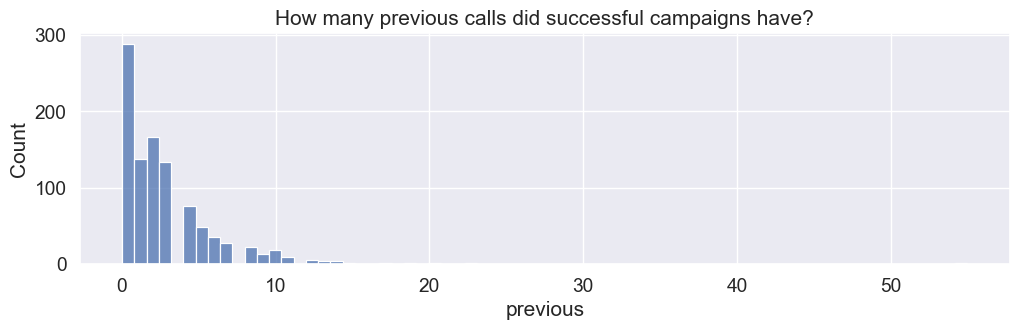

In [136]:
subscription_successes = df[df['subscribed'] == 'yes']

plt.figure(figsize=(12,3))
sns.histplot(data=subscription_successes,x='previous').set_title('How many previous calls did successful campaigns have?')


Let us investigate the balance attribute further

<AxesSubplot: xlabel='age', ylabel='balance'>

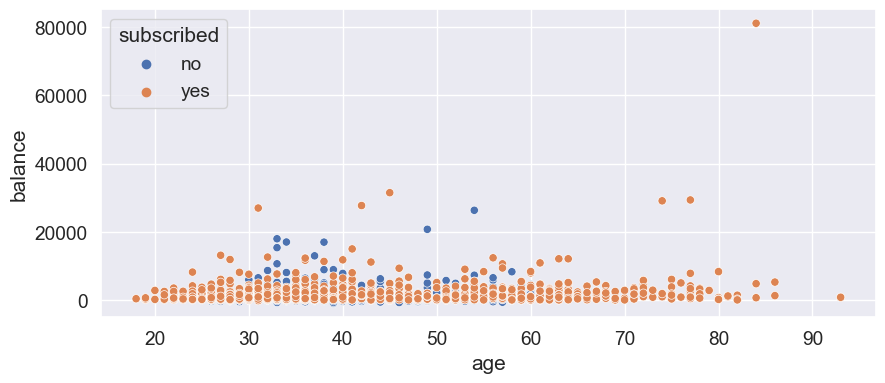

In [137]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='age', y='balance',hue='subscribed')

It might be worth excluding some of the outliers for the sake of visualising the data:

<AxesSubplot: xlabel='age', ylabel='balance'>

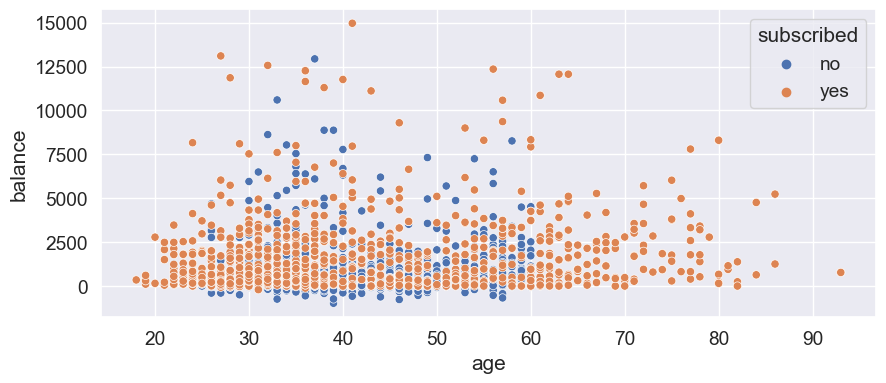

In [138]:
excluding_extreme_balances = df[df['balance'] < 15000]
plt.figure(figsize=(10,4))
sns.scatterplot(data=excluding_extreme_balances, x='age', y='balance',hue='subscribed')

One interesting inference we can make is that both the under 25s and over-60 age groups appear to be very willing to subscribe.

Text(0.5, 1.0, 'Under 25s conversion rates')

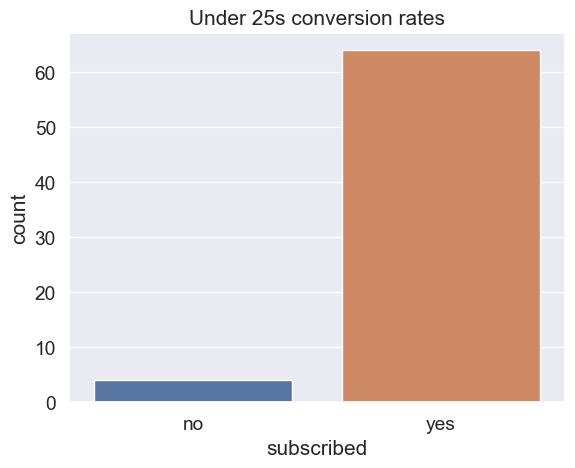

In [139]:
under_25 = df[df['age'] < 25]
sns.countplot(data=under_25, x='subscribed').set_title('Under 25s conversion rates')

Text(0.5, 1.0, 'Over 60s conversion rates')

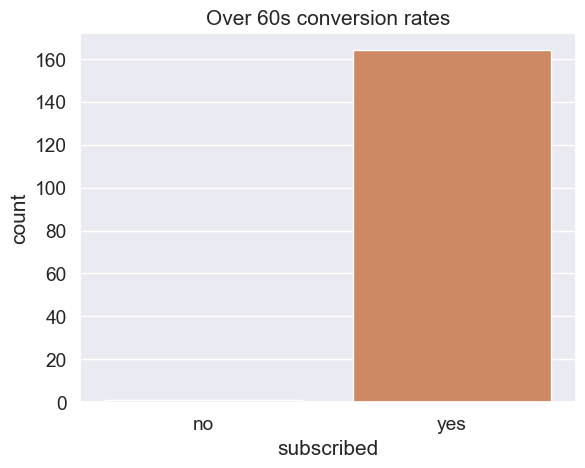

In [140]:
over_60s = df[df['age'] > 60]

sns.countplot(data=over_60s, x='subscribed').set_title('Over 60s conversion rates')

Could this group represent those who do not have mortgages? This dataset seems to suggest that anybody aged under 25 or over 60 is effectively guaranteed to subscribe and so repeated are definitely worth it should they not subscribe on the initial call. Perhaps it is in fact not age, but outstanding loans that are having this effect. Let us investigate.

Text(0.5, 1.0, 'Does this subscriber-heavy grouping have a mortgage?')

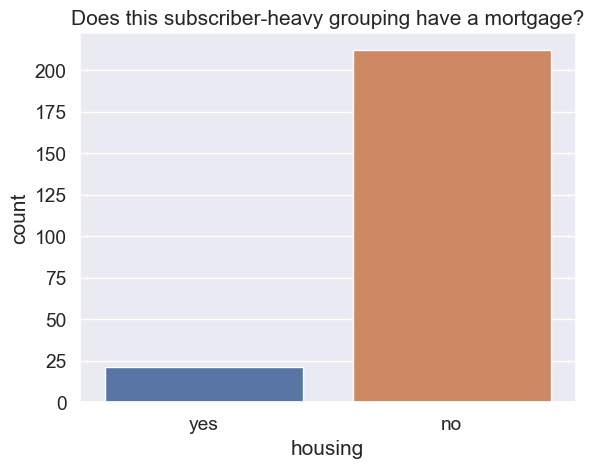

In [141]:
under_25_and_over_60 = df[(df['age'] < 25) | (df['age'] > 60)]
sns.countplot(data=under_25_and_over_60, x='housing').set_title('Does this subscriber-heavy grouping have a mortgage?')

Text(0.5, 1.0, 'Does this subscriber-heavy grouping have a personal loan?')

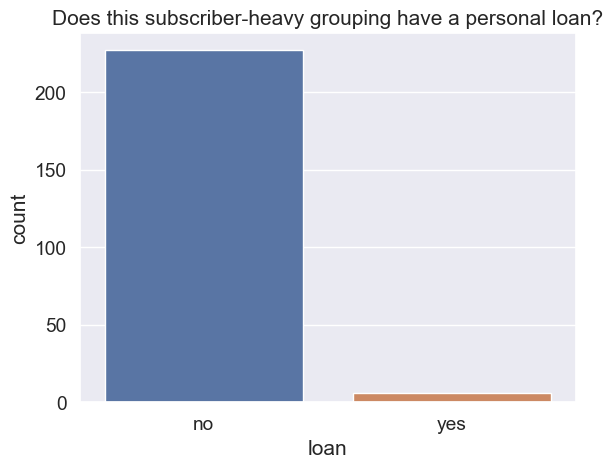

In [142]:
sns.countplot(data=under_25_and_over_60, x='loan').set_title('Does this subscriber-heavy grouping have a personal loan?')

Now let us examine whether for the excluded cohort, i.e. those between the ages of 25 and 60, how tightly coupled are the likeliness of subscription with the existence of pre-existing loans.

For this, we will create a new column 'any_loans' to show whether a client has either a personal loan OR a sample

In [143]:
df['any_loan'] = (df['loan'] == 'yes') | (df['housing'] == 'yes')

df['any_loan'].value_counts()


True     1043
False     957
Name: any_loan, dtype: int64

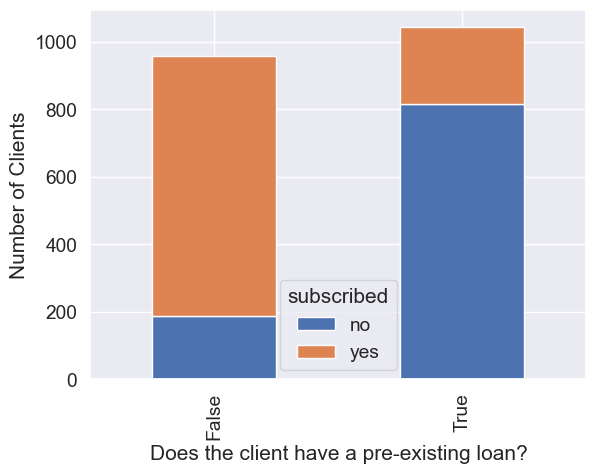

In [144]:
crosstab_CL = pd.crosstab(df['any_loan'], df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True)
plt.ylabel('Number of Clients')
plt.xlabel('Does the client have a pre-existing loan?')
plt.show()

## some note 

In [145]:
df[df['previous'] == 0].groupby('subscribed').describe().transpose()

subscribed               no           yes
age      count   166.000000    287.000000
         mean     38.433735     39.909408
         std       8.268513     15.136632
         min      24.000000     18.000000
         25%      32.000000     28.500000
         50%      37.000000     35.000000
         75%      44.000000     49.000000
         max      60.000000     86.000000
balance  count   166.000000    288.000000
         mean    503.108434   1692.864583
         std     976.655474   3075.493895
         min    -768.000000    -27.000000
         25%      28.500000    322.500000
         50%     195.500000    735.000000
         75%     544.750000   1978.000000
         max    7317.000000  31472.000000
day      count   166.000000    288.000000
         mean      8.000000     15.531250
         std       0.000000      8.378610
         min       8.000000      1.000000
         25%       8.000000      8.000000
         50%       8.000000     15.500000
         75%       8.000000     22.000000
         max       8.000000     31.000000
duration count   166.000000    288.000000
         mean    224.734940    408.322917
         std     175.411937    269.993347
         min      14.000000     23.000000
         25%     108.000000    237.750000
         50%     183.000000    327.000000
         75%     283.000000    485.250000
         max    1007.000000   1720.000000
campaign count   166.000000    288.000000
         mean      1.602410      1.906250
         std       1.020276      1.328420
         min       1.000000      1.000000
         25%       1.000000      1.000000
         50%       1.000000      1.000000
         75%       2.000000      2.000000
         max       8.000000     11.000000
pdays    count   166.000000    288.000000
         mean     -1.000000     -1.000000
         std       0.000000      0.000000
         min      -1.000000     -1.000000
         25%      -1.000000     -1.000000
         50%      -1.000000     -1.000000
         75%      -1.000000     -1.000000
         max      -1.000000     -1.000000
previous count   166.000000    288.000000
         mean      0.000000      0.000000
         std       0.000000      0.000000
         min       0.000000      0.000000
         25%       0.000000      0.000000
         50%       0.000000      0.000000
         75%       0.000000      0.000000
         max       0.000000      0.000000

One inference we can clearly make is that the chance of somebody subscribing is skewed towards those with a larger bank balance. Of those that subscribed, those who in the bottom 25% of balance-size still tended to have more money than the majority of those that did not subscribe. 

In [146]:
clients_no_previous_calls = df[df['previous'] == 0]
clients_multiple_calls = df[df['previous'] > 0]
print('Clients called only once: ', len(clients_no_previous_calls))
print('Clients that received follow up calls: ', len(clients_multiple_calls))

Clients called only once:  454
Clients that received follow up calls:  1546


### How often did clients subscribe on the initial call?

Text(0.5, 1.0, 'Conversion rates on the first call')

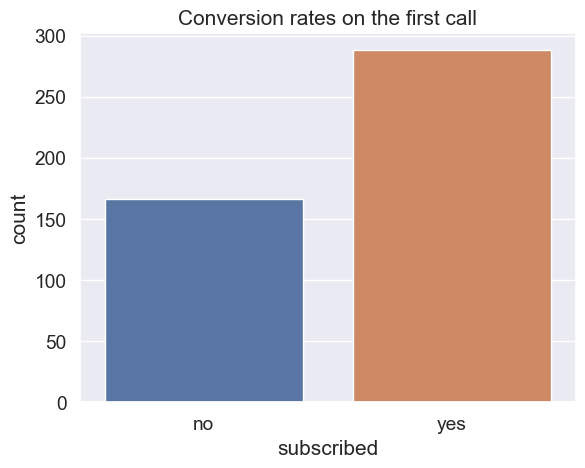

In [147]:
sns.countplot(data=clients_no_previous_calls, x='subscribed').set_title('Conversion rates on the first call')

In [148]:
def getPercentages(data):
    subscribed = data[data['subscribed'] == 'yes']
    pct_subscribed = len(subscribed)/len(data)
    return [pct_subscribed, 1-pct_subscribed], ['Subscribed', 'Did Not Subscribe']

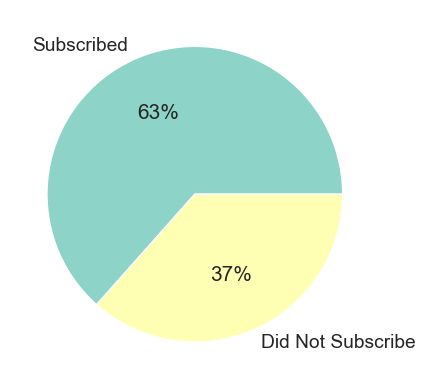

In [149]:
colors = sns.color_palette('Set3')[0:5]

data, labels = getPercentages(clients_no_previous_calls)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

A conversion rate of 63% percent seems pretty good for a first call. It may be the case that if the client does not subscribe after this, it is not worth pursuing further, and instead to opt for a fresh call with a new client may be more efficient. Later on in this investigation, it might also be worth exploring the duration attribute and figuring out is there an optimum time-limit within the first call from where there is diminishing returns on continuing with the call.

### If there was 1 previous call, how often did that client subscribe on the second call?

Text(0.5, 1.0, 'Conversion rates, only 1 previous call')

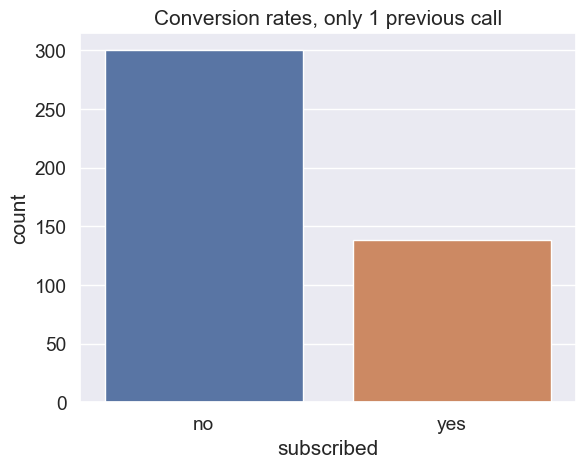

In [150]:
one_previous_call = df[df['previous'] == 1]
sns.countplot(data=one_previous_call, x='subscribed').set_title('Conversion rates, only 1 previous call')

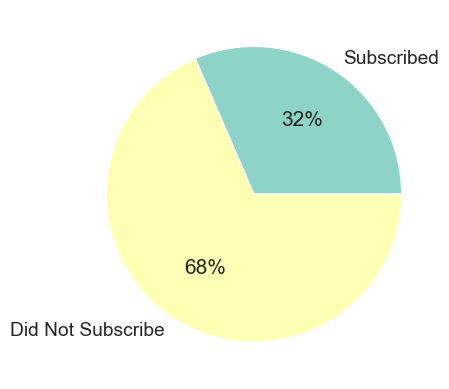

In [151]:
data, labels = getPercentages(one_previous_call)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

These plots are showing the success rates of a single follow-up call. Already the success rate has plummeted from a 63% chance of success on the initial call, to just a 32% chance on the follow up.

### How often did a client subscribe on the 3rd call?

Text(0.5, 1.0, 'Conversion rates, 2 previous calls')

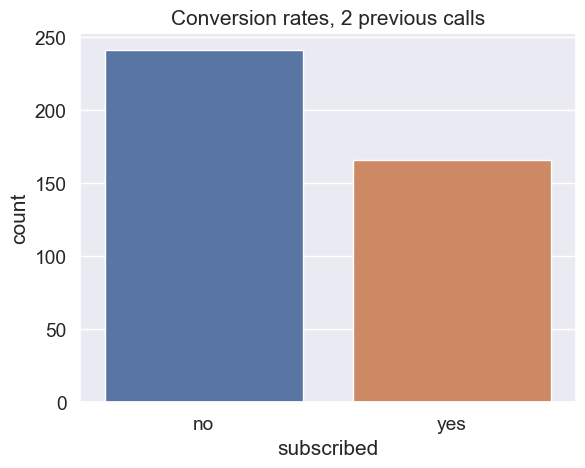

In [152]:
two_previous_calls = df[df['previous'] == 2]
sns.countplot(data=two_previous_calls, x='subscribed').set_title('Conversion rates, 2 previous calls')

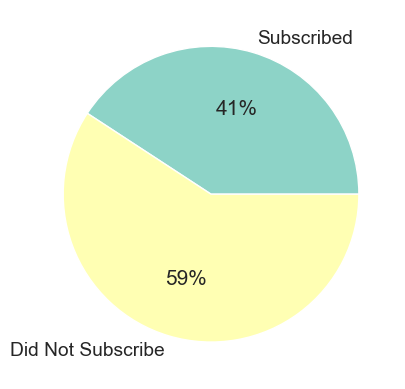

In [153]:
data, labels = getPercentages(two_previous_calls)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

By the third call, the probability of success has increased slightly on the previous call. However, due to the extra time expended getting to this point, it is doubtful whether it was worth it to continue just to receive this probabilistic bonus. 

Text(0.5, 1.0, 'Conversion rates, 3 previous calls')

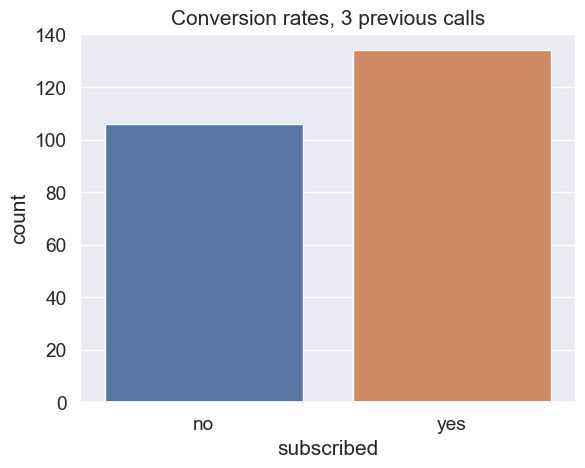

In [154]:
three_previous_calls = df[df['previous'] == 3]
sns.countplot(data=three_previous_calls, x='subscribed').set_title('Conversion rates, 3 previous calls')

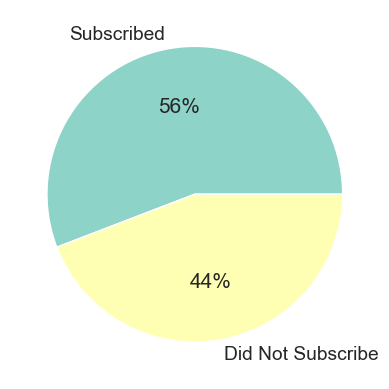

In [155]:
data, labels = getPercentages(three_previous_calls)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

From investigating the first few follow-up calls and seeing that their success rates never reach that of the initial call, I believe it would be a better strategy to prioritise first-calls. Follow-up calls should be explored after the client list has been exhausted of fresh contacts. 

---

# Requirement 4

### Generate two plots with the combined distribution of attributes and draw conclusions from them (approx. 150 words in a markdown cell).

We can use a pairplot to get a very high level view of how the different variables relate to each other

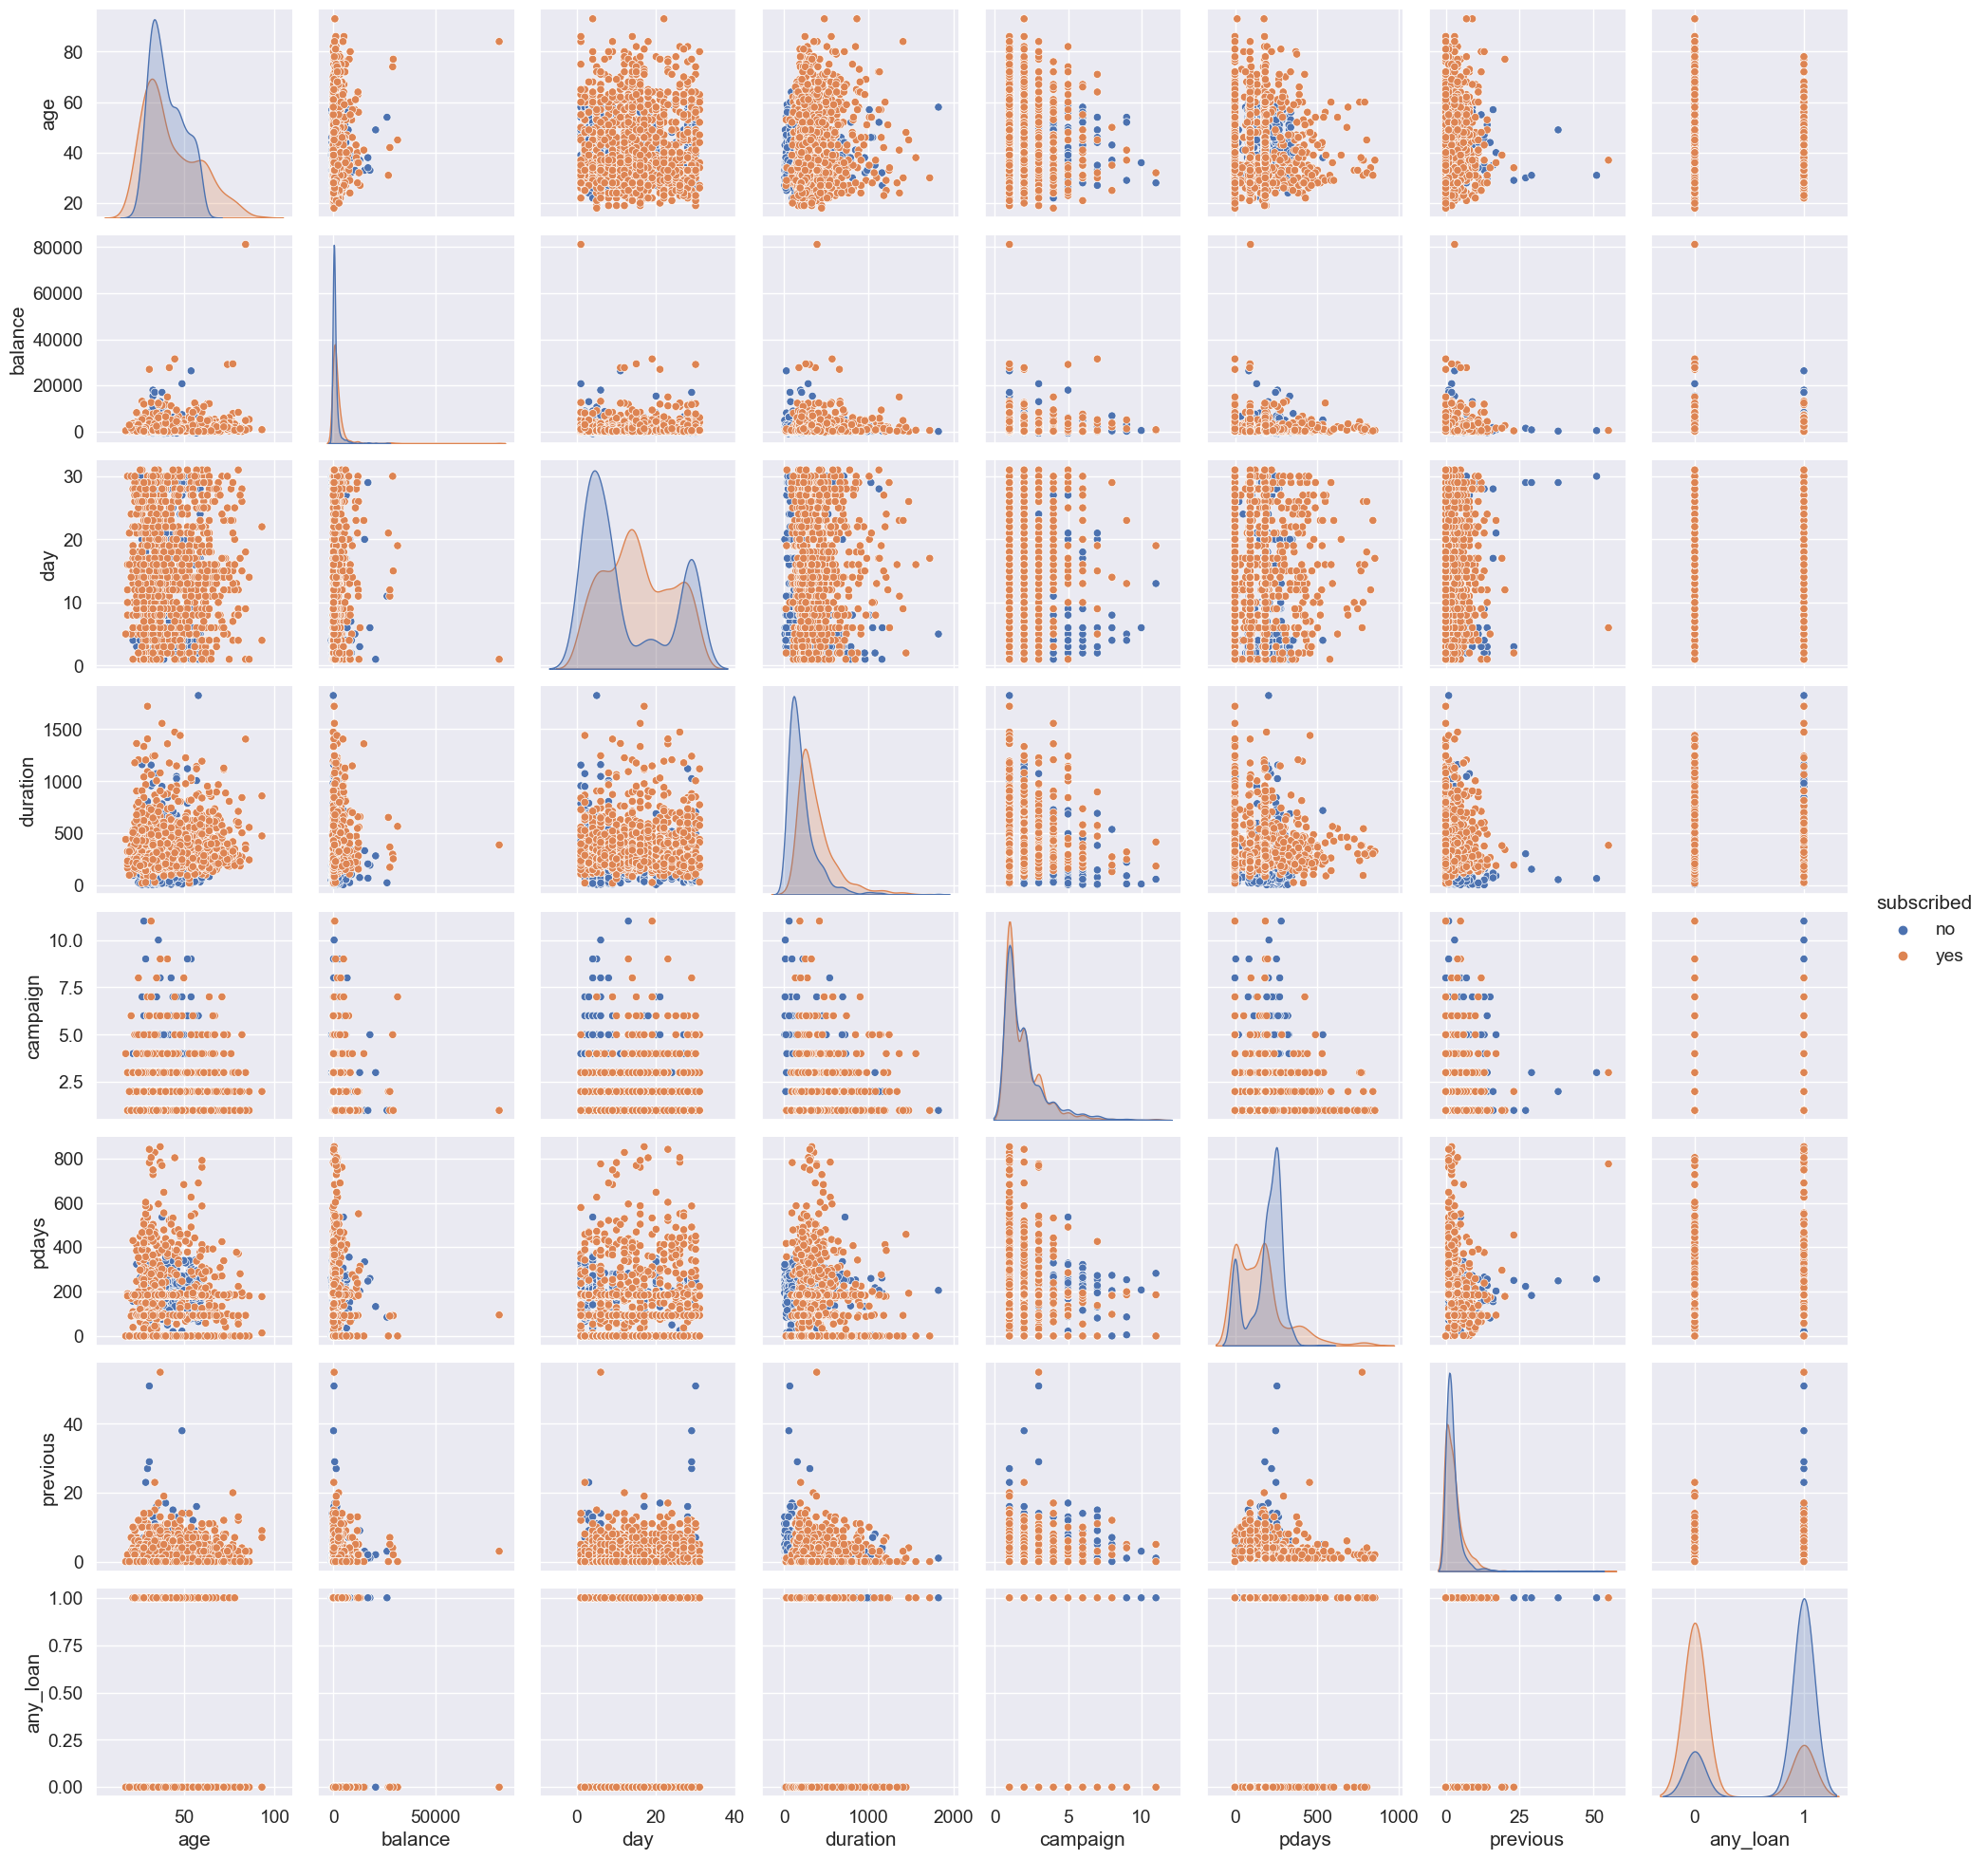

In [156]:
sns.pairplot(df,hue='subscribed')

/var/folders/xh/2kbx17395jq_p4kd_p_fw5gr0000gq/T/ipykernel_63065/1542321578.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', annot_kws={'size': 10});


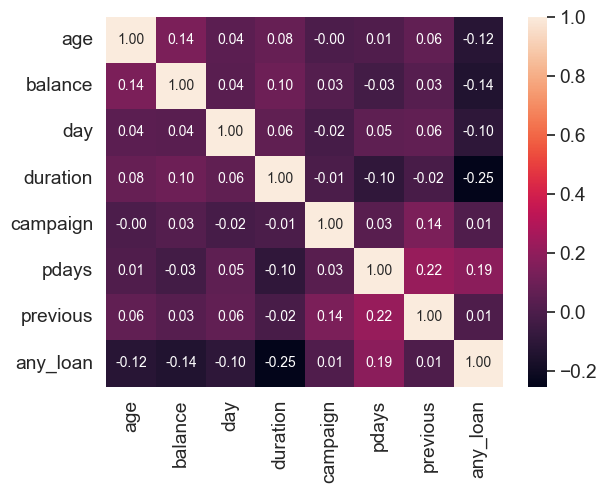

In [157]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', annot_kws={'size': 10});

The heatmap seems to suggest very little correlation between any of the mumerical features. Sometimes, if two features have a very high correlation, one of them can be dropped as they can be conveying the same information. In this case, no such inference can be made.

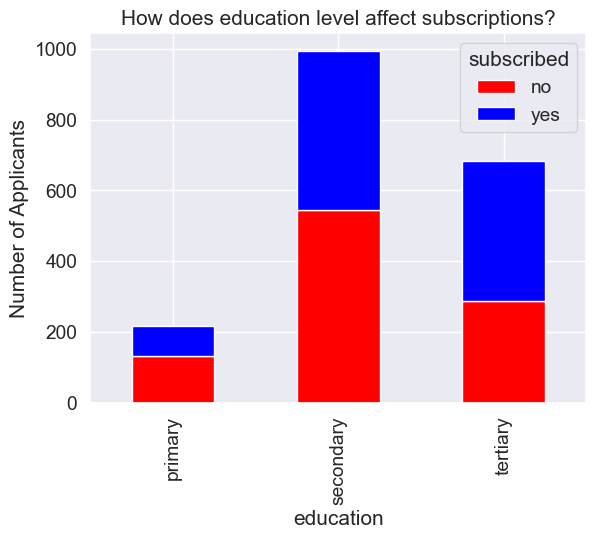

In [158]:
education_ct = pd.crosstab(df['education'], df['subscribed'])
education_ct.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.title('How does education level affect subscriptions?')
plt.show()

From this chart we can see that with respect to education levels, it is only for those with tertiary education that the probability of becoming a subscriber is greater than a coinflip.

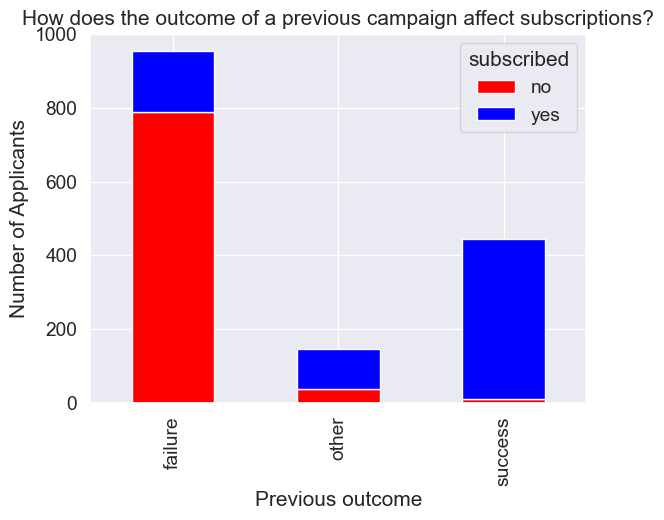

In [159]:
education_ct = pd.crosstab(df['poutcome'], df['subscribed'])
education_ct.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.xlabel('Previous outcome')
plt.ylabel('Number of Applicants')

plt.title('How does the outcome of a previous campaign affect subscriptions?')
plt.show()

This chart shows us that for those who have already been targeted in previous campaigns, the outcome of those campaigns are good predictors of outcome in future campaigns. It would appear that if a candidate had been successfully converted in previous campaigns, they almost certainly to have subscribed in the current campaign.
The same (with slightly less likelihood) can be be said about previous failed campaigns.

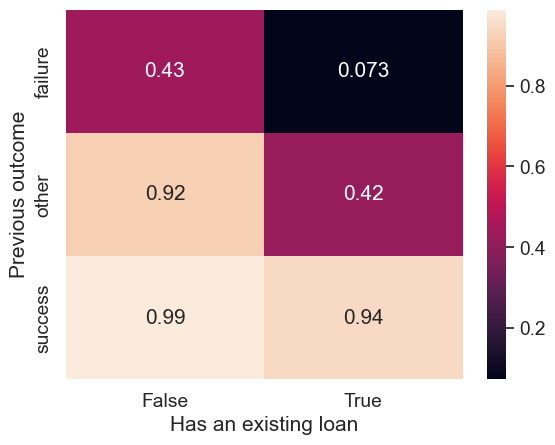

In [160]:
successful_poutcome = df[df['poutcome'] == 'success']

pivot_table_LCG = df.pivot_table(values='subscribed', 
                           index='poutcome', 
                           columns='any_loan',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.xlabel('Has an existing loan')
plt.ylabel('Previous outcome')
plt.show()

This heatmap tables the outcome of previous campaigns and whether the customer has an existing loan. 

Two very clear inferences we can make:
 1. If there was a previous successful campaign, this customer is extremely likely to subscribe, regardless of their current indebtedness.
 2. If previous campaigns failed and the customer has an existing loan/mortgage, there is only a 7% chance of subscription and so probably not worth the time/effort to pursue them as prospects.